In [1]:
from math import sin, sqrt, exp, cos
import matplotlib.pyplot as plt
from case3_rk4 import rk_defect_control_static_alpha, rk_defect_control_perfect_first_step_smooth, rk_defect_control_perfect_first_step

In [2]:
def create_t_eval(start, end, num_points = 100):
    res = [start]
    h = (end - start)/(num_points - 1)

    for _ in range(num_points - 1):
        res.append(
            res[-1] + h
        )
    return res

In [3]:
def experiment(model, y0, t_span, solution):
    t_eval = create_t_eval(t_span[0], t_span[1])
    tol = 1e-6
    (res, sol, first_deriv, derivs) = rk_defect_control_perfect_first_step(model, t_span, y0[0], tol, solution)
    # (res, sol, first_deriv, derivs) = rk_defect_control_perfect_first_step_smooth(model, t_span, y0[0], tol, solution)
    # (res, sol, first_deriv, derivs) = rk_defect_control_static_alpha(model, t_span, y0[0], tol, solution)
    # print("derivs", derivs)
    print("integration complete")

    # ====================================== figure of rk6 vs rk6_interps vs rk45
    # plt.figure()
    xs = [x[0] for x in res]
    # ys = [x[1] for x in res]
    # plt.plot(xs, ys, label="rk6")

    # plots of where the end of the steps occured to look at the interp
    for this_x in xs:
        plt.axvline(x=this_x) 

    computed_solutions = [sol(x) for x in t_eval]
    plt.plot(t_eval, computed_solutions, label="rk6_interpolated")

    actual_solutions = solution(t_eval)
    plt.plot(t_eval, actual_solutions, label="solution")

    # removed rk45 plt.title("solution vs rk45 vs rk6 vs rk6_interpolated")
    plt.title("solution vs rk6_interpolated")
    plt.xlabel("t")
    plt.ylabel('y')
    plt.legend(loc="upper right")
    plt.show()
    # ====================================== end figure of rk6 vs rk6_interps vs rk45

    # ====================================== global error
    plt.figure()
    error = [(computed_solution - actual_solution) for (computed_solution, actual_solution) in zip(computed_solutions, actual_solutions)]
    for this_x in xs:
        plt.axvline(x=this_x) 
    plt.plot(t_eval, error, label="global error")
    plt.title("global error")
    plt.xlabel("t")
    plt.ylabel("error")
    plt.legend(loc="upper right")
    plt.show()
    # ====================================== end of global error

    # ====================================== figure of satisfying global defect
    actual_f_evals = [model(x, solution([x])[0])[0] for x in t_eval]
    hb_prime_evals = [first_deriv(x) for x in t_eval]
    plt.figure()
    plt.plot(t_eval, actual_f_evals)
    plt.plot(t_eval, hb_prime_evals)
    plt.title(f"first derivative for tol={tol}")
    plt.show()

    defects = [abs(actual_f_eval - hb_prime_eval) for (actual_f_eval, hb_prime_eval) in zip(actual_f_evals, hb_prime_evals)]
    plt.figure()
    plt.plot(t_eval, defects)
    plt.title(f"global defect for tol={tol}")
    plt.show()
    
    # ====================================== end figure of satisfying global defect

    # ====================================== figure of defect shape

    minimum_step_size = 0.01
    defects_small_steps = []
    plt.figure()
    for (x_i_minus_1, x_i, x_i_plus_1, hb) in derivs:
        num_points = 100
        pts_to_sample = create_t_eval(x_i, x_i_plus_1, num_points)
        defects = []
        for pt in pts_to_sample:
            y = solution([pt])[0]
            f_eval  = model(pt, y)[0]
            hb_prime_eval = hb.prime(pt)
            defects.append( abs(hb_prime_eval - f_eval) )
        maximum_defect = max(defects)
        # minimum_defect = min(defects)
        # plot_vals = [(defect - minimum_defect) / (maximum_defect - minimum_defect) for defect in defects]
        plot_vals = [ defect/ maximum_defect for defect in defects]
        #plt.plot(xs, defects, label=f"x_{str(x_i_minus_1)}_{str(x_i_plus_1)}")
        x_axis = [i/(num_points - 1) for i in range(num_points)]

        if (x_i_plus_1 - x_i < minimum_step_size):
            defects_small_steps.append([x_axis, plot_vals])
            continue
        plt.plot(x_axis, plot_vals, label=f"x_{str(x_i_minus_1)}_{str(x_i_plus_1)}")
    plt.title("plot of defects")
    plt.xlabel("x_i to x_i_plus_1")
    plt.ylabel('defect/(max_defect on x_i to x_i_plus_1)')
    # plt.legend()
    plt.show()
    # ====================================== end figure of defect

    # ====================================== defects on small steps
    plt.figure()
    for [x_axis, plot_vals] in defects_small_steps:
        plt.plot(x_axis, plot_vals)
    plt.title("plot of defects on small step sizes")
    plt.xlabel("x_i to x_i_plus_1")
    plt.ylabel('defect/(max_defect on x_i to x_i_plus_1)')
    plt.show()

    # ========================================================= end of steps error vs interpolant error
    for (x, y) in res:
        print(abs(y - solution([ x ])[0]))

tolerance= 1e-06
alpha values [0.5, 1.0, 0.9999999999999997, 1.0000000000000002, 0.5000000000000002, 1.0000000000000007, 0.49999999999999967, 0.9999999999999987, 0.5000000000000007]
n_steps 42
n_successful_steps 40

integration complete


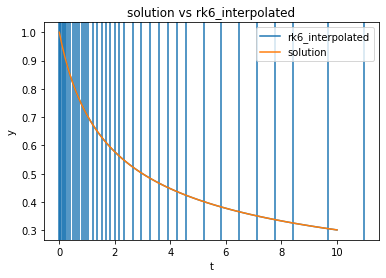

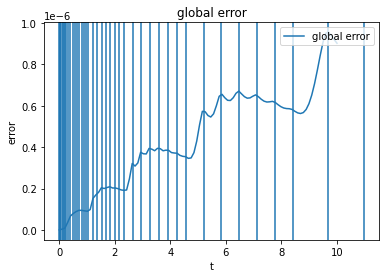

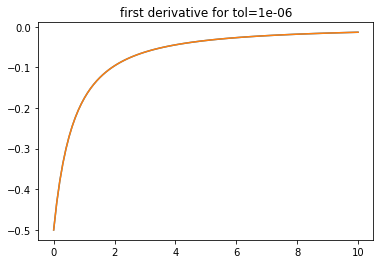

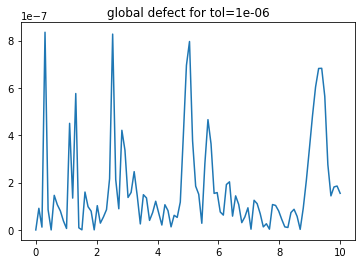

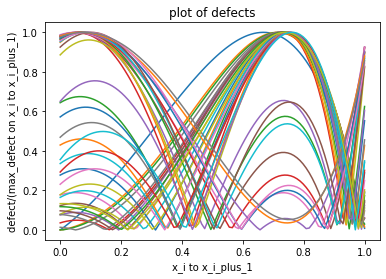

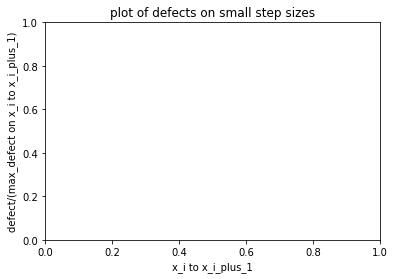

0.0
0.0
3.871458709170383e-12
1.1863088289487678e-10
3.282841443130735e-09
5.692904925247433e-09
7.522905298706917e-09
8.904057713365887e-09
9.936095723972471e-09
4.5515102908844085e-08
6.774334671000304e-08
8.13300803370609e-08
8.924739081095368e-08
9.341001727669607e-08
9.507338893932626e-08
9.507297948907478e-08
9.397169931091298e-08
9.215260632355893e-08
8.987834065887768e-08
1.5355722526866344e-07
1.8718671146444876e-07
2.0328462935204072e-07
2.090208494065493e-07
2.086141783763651e-07
2.0460070082606308e-07
1.9852988009105843e-07
1.913588800750432e-07
3.217891612061763e-07
3.7875825220634596e-07
3.978623688283278e-07
3.972247597516798e-07
3.8641164429309427e-07
3.7060472896088825e-07
3.526550964028097e-07
5.795193745439242e-07
6.577621356473884e-07
6.688847294378242e-07
6.49650638839816e-07
6.173983403967576e-07
5.805235667177833e-07
9.5713663883501e-07
1.0525106158287834e-06


In [4]:
t_span_1 = [0, 10]
y0_1 = [1]

def model1(t, y):
    return [(-1/2) * y**3]

def solution1(t):
    return [1/sqrt(1+x) for x in t]

experiment(model1, y0_1, t_span_1, solution1)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.9999999999999997, 1.0000000000000002, 1.0000000000000007, 0.49999999999999967, 1.9999999999999987, 0.5000000000000007, 1.0000000000000029, 0.9999999999999972]
n_steps 99
n_successful_steps 87

integration complete


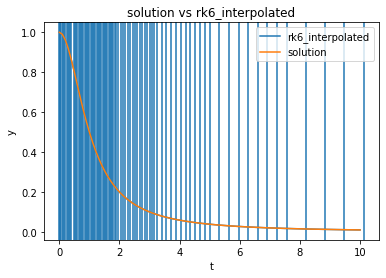

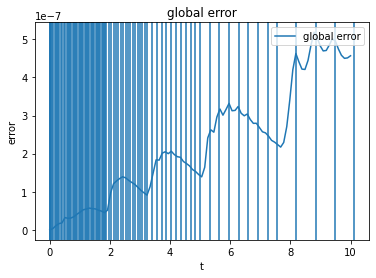

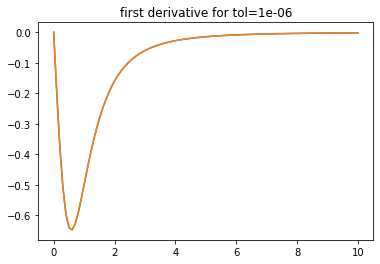

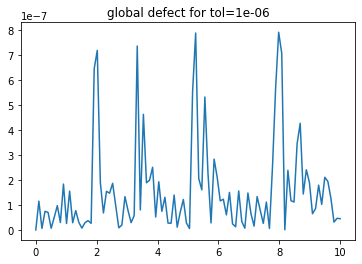

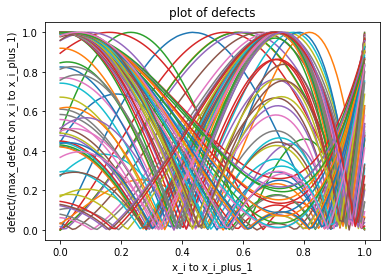

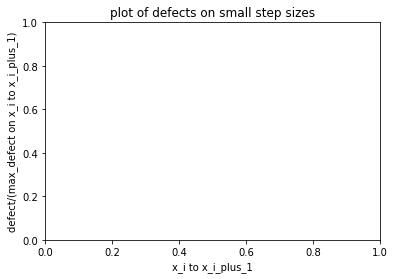

0.0
0.0
5.151434834260726e-13
3.3180014291644966e-11
2.0481820683926344e-09
4.813282439286581e-09
7.979097937926838e-09
1.1158014401324579e-08
1.399482074670999e-08
1.6225374932510306e-08
1.771215474288823e-08
1.8452428474091676e-08
1.856161302438153e-08
3.416079219498158e-08
3.2684128403737134e-08
3.149484606446151e-08
3.076081500630323e-08
3.0584714760806264e-08
3.100436751779512e-08
3.2000598837456096e-08
3.3509566010891945e-08
3.543679794049126e-08
3.767082423777879e-08
4.0095007425300366e-08
4.2596859262111764e-08
4.507466278003136e-08
4.744157378056002e-08
4.9627588538658785e-08
5.157985161208245e-08
5.326177415776456e-08
5.465138719351614e-08
5.573927569502146e-08
5.6526360148190236e-08
5.7021712962512794e-08
5.724053564470921e-08
5.720236501138842e-08
5.692954246905302e-08
5.644595096887528e-08
5.5776004315166716e-08
5.4943867067169805e-08
5.397287355934921e-08
5.2885116452738856e-08
5.170117378661132e-08
5.043994816267272e-08
4.911859224909776e-08
4.77525010644797e-08
4.635535

In [5]:
t_span_2 = [0, 10]
y0_2 = [1]

def model2(t, y):
    return [-2*t*y**2]

def solution2(t):
    return [1/(1+x**2) for x in t]

experiment(model2, y0_2, t_span_2, solution2)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.49999999999999983, 1.0000000000000002, 0.9999999999999997, 0.5000000000000002, 1.0000000000000007, 0.49999999999999967, 0.9999999999999987]
n_steps 30
n_successful_steps 24

integration complete


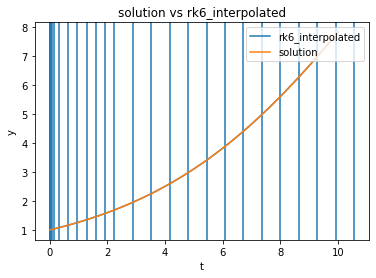

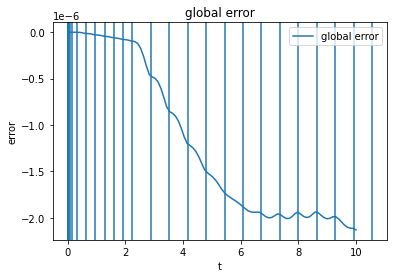

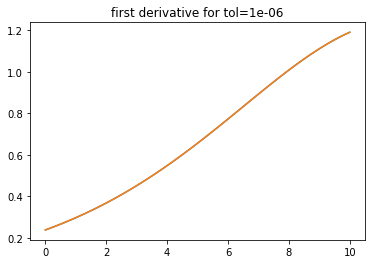

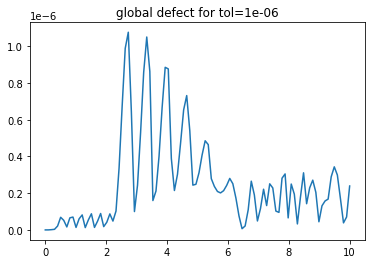

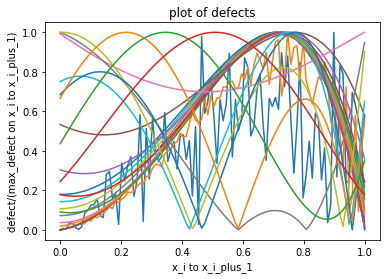

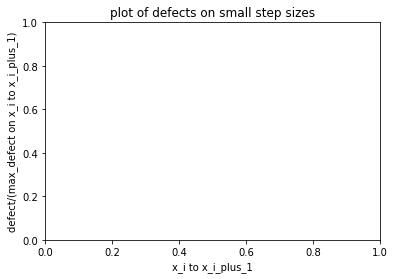

0.0
0.0
2.220446049250313e-16
1.3322676295501878e-14
4.283240429003854e-13
1.3700818257689207e-11
4.3832515395081373e-10
1.3989798652858099e-08
2.8575176225231758e-08
4.4141771793348994e-08
6.061571888871242e-08
7.790088485393198e-08
9.587839144842292e-08
4.771183308438509e-07
8.543324834242583e-07
1.2042566721603976e-06
1.503567515825921e-06
1.7329000923105298e-06
1.8815422362372658e-06
1.9517798630630523e-06
1.9614086390618013e-06
1.9428077377980912e-06
1.937482537073265e-06
1.9862596802866506e-06
2.1171317765578124e-06
2.3344175303918746e-06


In [6]:
t_span_3 = [0, 10]
y0_3 = [1]

def model3(t, y):
    return [(1/4)*y*(1 - y/20)]

def solution3(t):
    return [20 / ( 1 + 19 * exp(-x/4) ) for x in t]

experiment(model3, y0_3, t_span_3, solution3)

tolerance= 1e-06
alpha values [0.5000000000000007, 1.0, 2.0000000000000004, 3.999999999999999, 0.9999999999999987, 1.0000000000000029, 0.9999999999999972, 0.5, 8.000000000000004, 2.0, 1.000000000000011, 1.0000000000000444, 1.9999999999996447, 1.0000000000003553, 2.0000000000007105, 15.999999999999986, 0.9999999999999556, 1.0000000000000222, 0.5000000000000888, 0.9999999999999889, 0.9999999999998224, 0.49999999999982236]
n_steps 4081
n_successful_steps 3918

integration complete


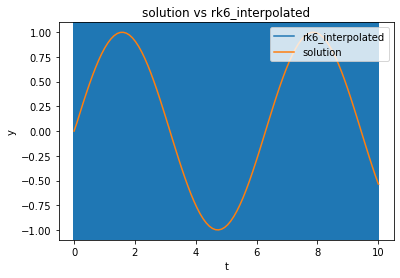

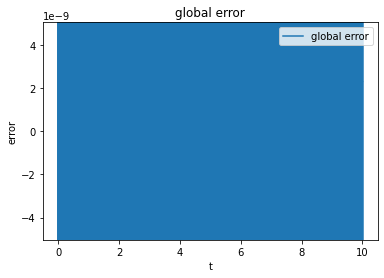

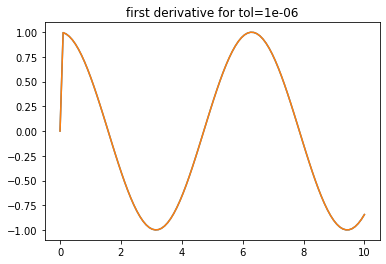

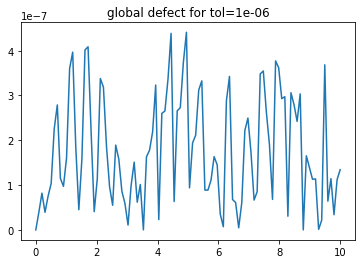

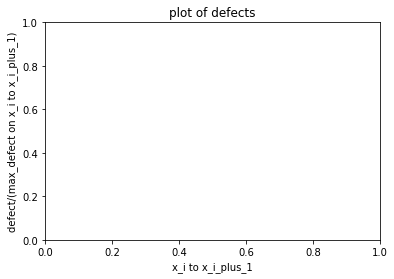

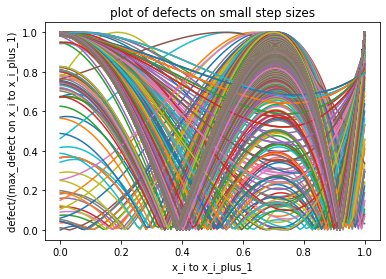

0.0
0.0
2.8928275573603113e-11
5.4350370558287064e-11
7.658491982948101e-11
9.592481062942193e-11
1.1263914627412941e-10
7.695901502874358e-10
1.2705339254640013e-09
1.6430579414389301e-09
1.9104204294906335e-09
2.092186885543912e-09
2.2047767622018766e-09
2.2619326568024123e-09
2.2751226944062175e-09
2.253885293679314e-09
2.2061243283577614e-09
2.1383615503300923e-09
2.0559522730112523e-09
1.963269435911741e-09
1.86386053813159e-09
1.7605812675791643e-09
1.6557090108670902e-09
1.5510394704709718e-09
1.4479682904078306e-09
1.3475603515000767e-09
1.2506082107399674e-09
1.1576813882530068e-09
1.0691678722918319e-09
9.853088692168832e-10
1.917007268203985e-09
2.377767156780397e-09
2.5297798994516896e-09
2.486526734513106e-09
2.3263921830607437e-09
2.1026380497835007e-09
1.8506824406294697e-09
1.5933876232332445e-09
1.3448817198780105e-09
2.7549395265058507e-09
1.9358299407912227e-09
3.5920014185286675e-10
1.3161160633545776e-09
2.8323561829246557e-09
2.2800604460027074e-09
1.8547311603223

In [7]:
t_span_4 = [0, 10]
y0_4 = [0]

def model4(t, y):
    return [100 * (sin(t) - y)]
    # return [10 * (sin(t) - y)]

def solution4(t):
    return [( 100 * ( exp(-100 * x) - cos(x) ) +  10000 * sin(x) ) / 10001 for x in t]
    # return [( 10 * ( exp(-10 * x) - cos(x) ) +  100 * sin(x) ) / 101 for x in t]

experiment(model4, y0_4, t_span_4, solution4)

tolerance= 1e-06
alpha values [0.9999999999999997, 1.0, 0.9999999999999987, 1.0000000000000002, 1.0000000000000007, 0.5000000000000007, 1.9999999999999973, 2.0, 0.5, 1.0000000000000222, 0.4999999999999889, 2.0000000000000444, 0.9999999999999556, 1.0000000000000444, 1.9999999999996447, 0.5000000000000888, 2.0000000000007105, 0.49999999999982236]
n_steps 1969
n_successful_steps 1647

integration complete


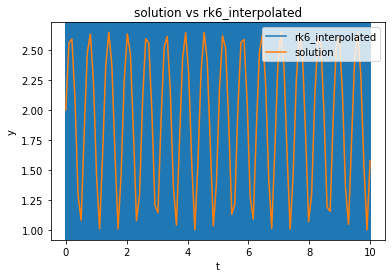

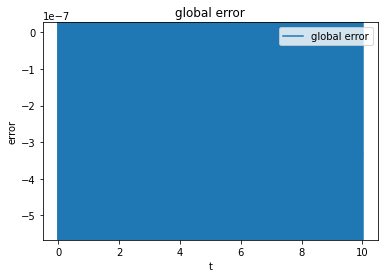

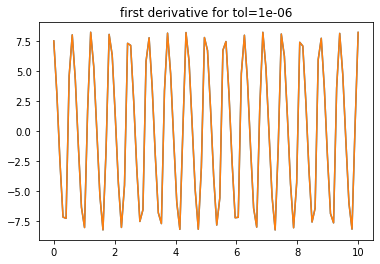

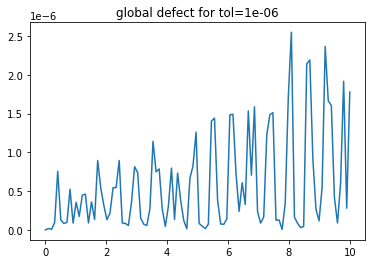

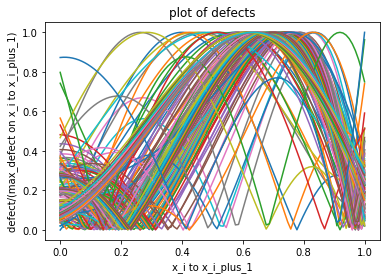

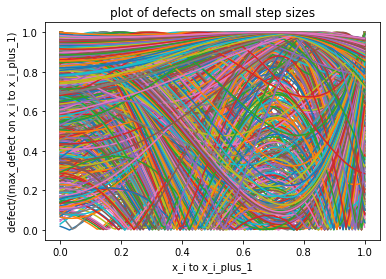

0.0
0.0
4.087377103445533e-09
7.991596717715765e-09
1.165246343859394e-08
1.503967039795384e-08
1.814056282967158e-08
2.0952691137665624e-08
2.3479272748261337e-08
2.5726441865714378e-08
2.7701581917227713e-08
2.9412333013567604e-08
3.0865998645879245e-08
3.206919352294335e-08
3.302763751378279e-08
3.3746020644542796e-08
3.422790539886478e-08
3.4475642340936474e-08
4.022232502620682e-08
3.981699236987879e-08
3.9186405675906144e-08
3.832574213546991e-08
3.7228368832131764e-08
3.588580543834041e-08
3.428784189907219e-08
3.242298740602223e-08
3.027951489542602e-08
2.784757935359039e-08
2.5123237712421087e-08
2.211576033417373e-08
1.8860622397198767e-08
1.544223127147859e-08
1.2033149809909105e-08
8.961015263153627e-09
6.820988440736642e-09
6.660642926092919e-09
1.0273378370229125e-08
1.0824681373478029e-08
1.153182971336264e-08
1.2436555785200198e-08
1.3589864789054218e-08
1.5052858737263364e-08
1.6896790189235844e-08
1.9201712664340675e-08
2.2052869530497787e-08
2.2447351089027734e-08
2.

In [8]:
t_span_5 = [0, 10]
y0_5 = [2]

def model5(t, y):
    return [(15 * cos(10 * t))/y]

def solution5(t):
    return [sqrt(3*sin(10*x) + 4) for x in t]

experiment(model5, y0_5, t_span_5, solution5)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.9999999999999997, 1.0000000000000002, 1.0000000000000007, 0.49999999999999967]
n_steps 30
n_successful_steps 30

integration complete


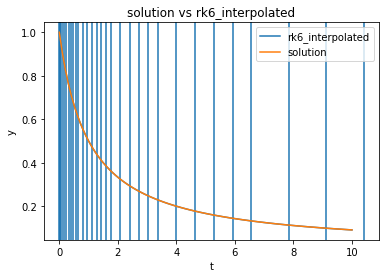

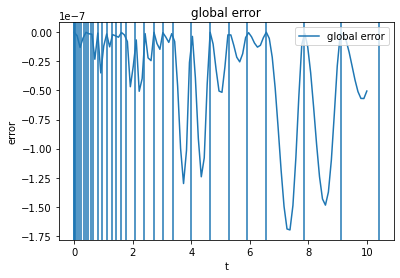

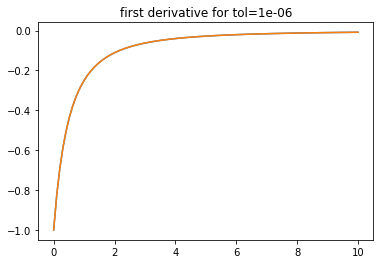

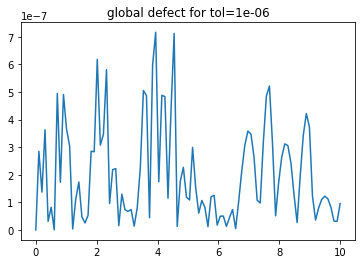

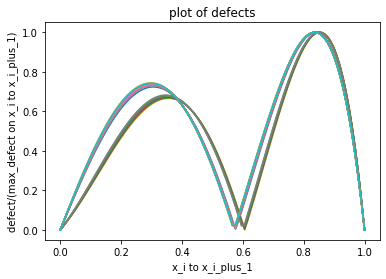

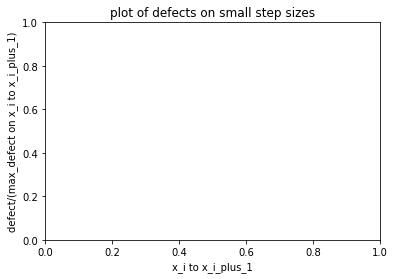

0.0
0.0
0.0
0.0
0.0
1.1102230246251565e-16
1.1102230246251565e-16
0.0
0.0
0.0
0.0
0.0
0.0
0.0
5.551115123125783e-17
5.551115123125783e-17
0.0
5.551115123125783e-17
5.551115123125783e-17
5.551115123125783e-17
5.551115123125783e-17
5.551115123125783e-17
8.326672684688674e-17
8.326672684688674e-17
8.326672684688674e-17
8.326672684688674e-17
8.326672684688674e-17
8.326672684688674e-17
8.326672684688674e-17
6.938893903907228e-17
6.938893903907228e-17
5.551115123125783e-17


In [9]:
t_span_6 = [0, 10]
y0_6 = [1]

def model6(t, y):
    return [-y/(t+1)]

def solution6(t):
    return [1/(x+1) for x in t]

experiment(model6, y0_6, t_span_6, solution6)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.9999999999999997, 1.0000000000000002, 1.0000000000000007, 0.9999999999999987, 0.5000000000000007, 1.9999999999999973, 2.0, 1.0000000000000056, 0.9999999999999944]
n_steps 73
n_successful_steps 62

integration complete


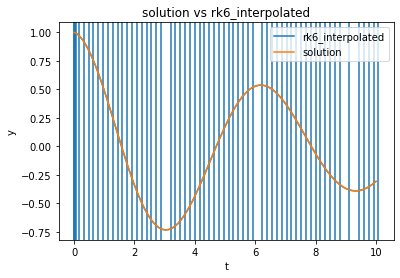

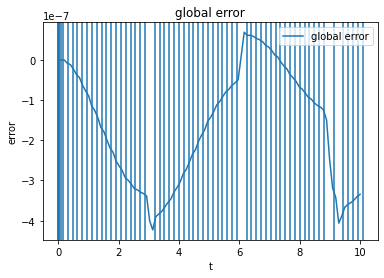

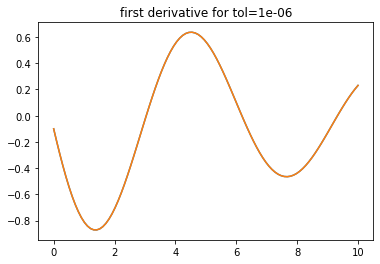

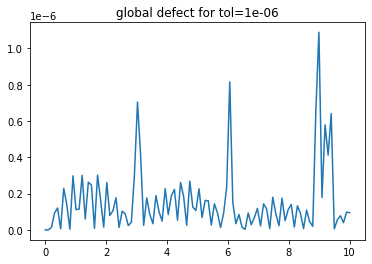

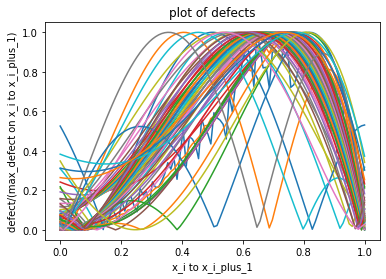

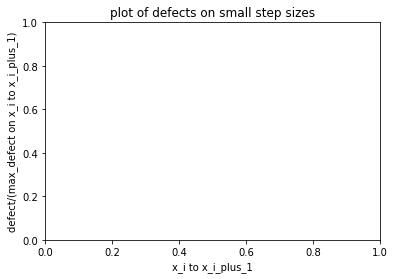

0.0
0.0
1.2212453270876722e-15
5.6066262743570405e-14
2.8617108682738035e-12
1.5854584312080533e-10
9.196520101006911e-09
2.3155815598308038e-08
4.144065102185124e-08
6.336554503327818e-08
8.81755251036509e-08
1.1506746466771745e-07
1.432119719479985e-07
1.7177525570011287e-07
1.9994041526583128e-07
2.2692763099185775e-07
2.5201277809028255e-07
2.745440395579557e-07
2.939561610237895e-07
3.0978205900478173e-07
3.2166157004631657e-07
3.293472108367723e-07
3.3270689547837407e-07
3.902945634459698e-07
3.8000335289556375e-07
3.659793419430457e-07
3.4860742381681575e-07
3.283467888692826e-07
3.057169022935291e-07
2.8128239426550294e-07
2.556372780404548e-07
2.2938892088597562e-07
2.0314217973049775e-07
1.7748410154755367e-07
1.5296955749311003e-07
1.3010814692293593e-07
1.0935266414602296e-07
9.108937026880426e-08
7.563026194201683e-08
6.32074690365414e-08
5.396985736094706e-08
6.05462148195457e-08
5.849350837028311e-08
5.351085780036513e-08
4.58410133186149e-08
3.5786932528480975e-08
2.370

In [10]:
t_span_7 = [0, 10]
y0_7 = [1]

def model7(t, y):
    alpha = 0.1
    return [ -alpha*y - exp(-alpha*t)*sin(t)]

def solution7(t):
    alpha = 0.1
    return [exp(-alpha*x)*cos(x) for x in t]

experiment(model7, y0_7, t_span_7, solution7)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.49999999999999983, 1.0000000000000002, 0.9999999999999997, 0.5000000000000002, 1.0000000000000007, 0.49999999999999967, 0.9999999999999987, 1.0000000000000029, 0.5000000000000007, 0.9999999999999972]
n_steps 99
n_successful_steps 83

integration complete


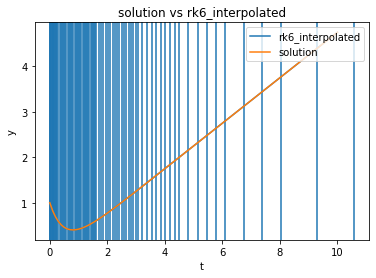

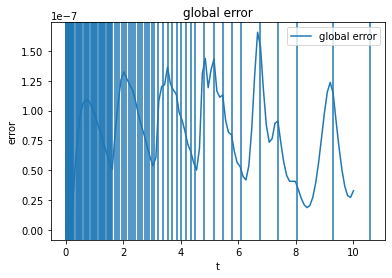

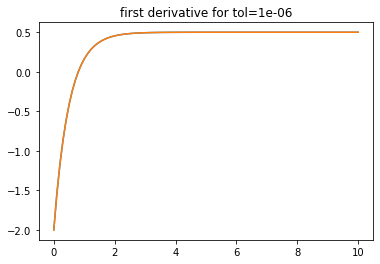

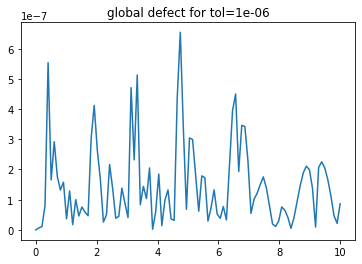

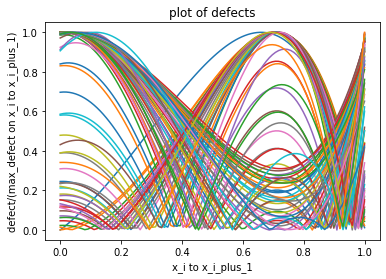

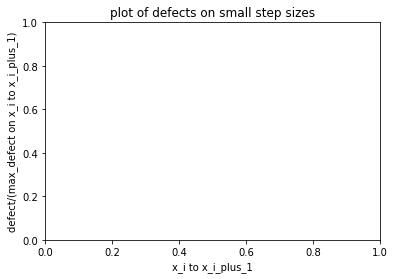

0.0
0.0
3.2564728691397704e-11
1.049336506575571e-09
1.9863217737281502e-09
2.848214220030343e-09
3.639462287097217e-09
4.36428082561946e-09
5.0266627527051355e-09
5.630389821043025e-09
6.179043832155173e-09
6.6760149630695764e-09
7.1245130905950305e-09
2.8270073060276957e-08
4.612202397780152e-08
6.106182204312915e-08
7.343173613616472e-08
8.353862018806169e-08
9.165733422245026e-08
9.803385109252716e-08
1.0288807306135794e-07
1.0641638725772395e-07
1.0879398110175131e-07
1.1017694157011704e-07
1.1070415645297871e-07
1.1049903664295257e-07
1.0967107488824013e-07
1.0831725633098088e-07
1.0652333476413034e-07
1.0436498609767142e-07
1.019088514131461e-07
9.921347859931373e-08
9.633017311605485e-08
9.330376549154806e-08
9.017330360183706e-08
8.697267694923738e-08
8.373117910132066e-08
8.047401389710274e-08
7.722275124910638e-08
7.399573692667971e-08
7.08084608724846e-08
6.767388782691341e-08
6.460275392417003e-08
6.160383336784037e-08
5.868417574106388e-08
5.584931972446583e-08
5.31034842

In [11]:
t_span_11 = [0, 10]
y0_11 = [1]

def model11(t, y):
    return [-2*y + t]

def solution11(t):
    return [1/4 * (-1 + 5 * exp(-2 * x) + 2 * x) for x in t]

experiment(model11, y0_11, t_span_11, solution11)

In [12]:
# THE PROBLEMS BELOW CANNOT BE DONE YET
# CANNOT BE DONE AS MY CURRENT rk6 does not handle a vector for the ys
### ======================================================================


# Jeff cash test set first one

t_span_8 = [0, 10]
eps = 0.1
a = exp(-1/eps)
y0_8 = [1, a/(eps*(-1+a))]

def model8(t, y):
    return [y[1], y[0]/eps]

def solution8(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [(1-exp(x/eps)*a)/(1-a) for x in t]

experiment(model8, y0_8, t_span_8, solution8)

## the results were extremely bad. So i wanted to see the solution
plt.figure()
plt.plot(t_span_8, solution8(t_span_8))



TypeError: 'int' object is not subscriptable

In [ ]:
# Jeff cash test set second one
t_span_9 = [0, 10]
eps = 0.1
y0_9 = [1, -1/sqrt(eps)]

def model9(t, y):
    return [y[1], (y[0] + y[0]**2 - exp(-2*t/sqrt(eps)))/eps]

def solution9(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [exp(-x/sqrt(eps)) for x in t]

experiment(model9, y0_9, t_span_9, solution9)

In [ ]:
# Wolfram Alpha first problem

t_span_10 = [0, 10]
y0_10 = [1, 2]

def model10(t, y):
    return [y[1], -3*y[0] + 2*cos(4*t)]

def solution10(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    s = sqrt(3)
    return [(26*s*sin(s*x) - 6*cos(4*x) + 45*cos(s*x))/39 for x in t]

experiment(model10, y0_10, t_span_10, solution10)